In [45]:
import os
import pandas as pd

from project.model import get_inputs
from project.utils import make_plots, cumulated_plot, cumulated_plots

In [38]:
insulation_dict = {'Wall': (True, False, False, False), 'Floor': (False, True, False, False),
              'Roof': (False, False, True, False), 'Windows': (False, False, False, True)}
insulation = pd.MultiIndex.from_frame(pd.DataFrame(insulation_dict))

2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:15:29,099 - 19524 - log_ - INFO - Creating AgentBuildings object


In [48]:
def analysis_cost_efficiency(building_stock='simple_1', val=None, level=None):

    resirf_inputs = get_inputs(variables=['buildings', 'energy_prices', 'cost_insulation'],
                               building_stock=os.path.join('project', 'input', 'stock', 'buildingstock_sdes2018_{}.csv'.format(building_stock)))
    buildings = resirf_inputs['buildings']
    energy_prices = resirf_inputs['energy_prices']
    cost_insulation = resirf_inputs['cost_insulation']

    output = buildings.mitigation_potential(energy_prices, cost_insulation)

    consumption_saved = output['Consumption saved (kWh/dwelling)'].loc[:, insulation]
    cost_insulation = output['Cost insulation (euro/dwelling)'].loc[:, insulation]
    cost_insulation[consumption_saved == 0] = 0
    consumption_before = output['Consumption before (kWh/dwelling)']
    cost_efficiency = cost_insulation / consumption_saved

    if level is not None:
        stock = buildings.stock.xs(val, level=level)
        consumption_saved = consumption_saved.xs(val, level=level)
        consumption_before = consumption_before.xs(val, level=level)
        cost_efficiency = cost_efficiency.xs(val, level=level)

    result = dict()
    for n, i in insulation_dict.items():
        y = cost_efficiency.loc[:, i].rename('Cost efficiency (euro/kWh)')
        x = consumption_saved.loc[:, i].rename('Consumption saved (%)') / consumption_before.sum()

        df = pd.concat((x, y), axis=1)

        # sort by marginal cost
        df.sort_values(y.name, inplace=True)

        df['{} cumulated'.format(x.name)] = df[x.name].cumsum()

        df.dropna(inplace=True)
        df = df.set_index('{} cumulated'.format(x.name))[y.name]
        result.update({n: df})

    make_plots(result, 'Cost efficiency (euro/kWh)')


    temp = dict()
    for i in ['Wall', 'Floor', 'Roof', 'Windows']:
        y = pd.Series(stock.index.get_level_values(i), index=stock.index,
                      name='{} insulation (W/m2.K)'.format(i)).astype('float')
        x = stock / 10 ** 6
        temp.update({i: cumulated_plot(x, y, plot=False)})

    cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)


2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:14,742 - 19524 - log_ - INFO - Crea

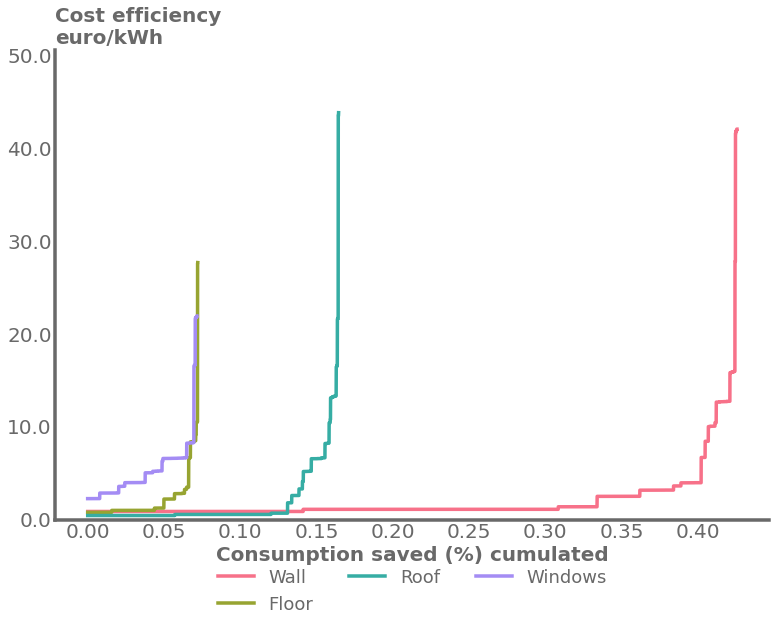

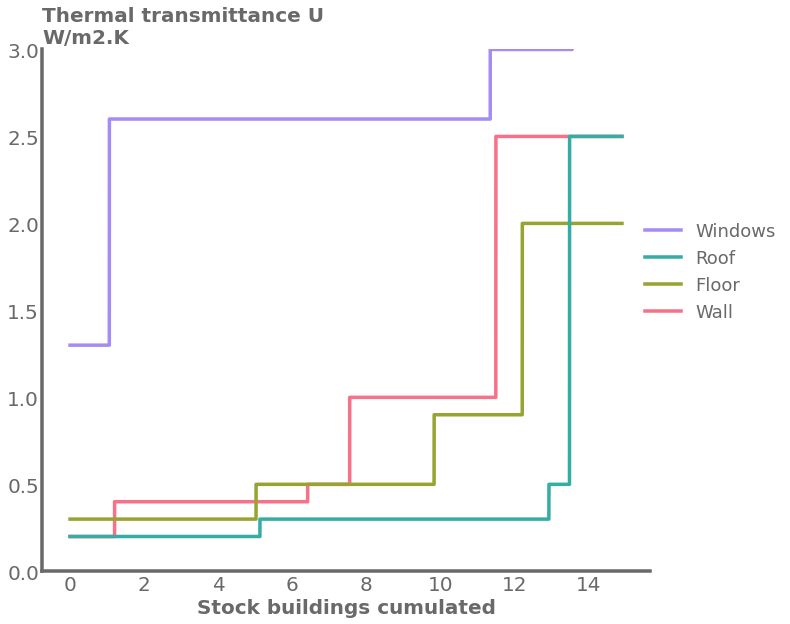

2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:34:20,464 - 19524 - log_ - INFO - Crea

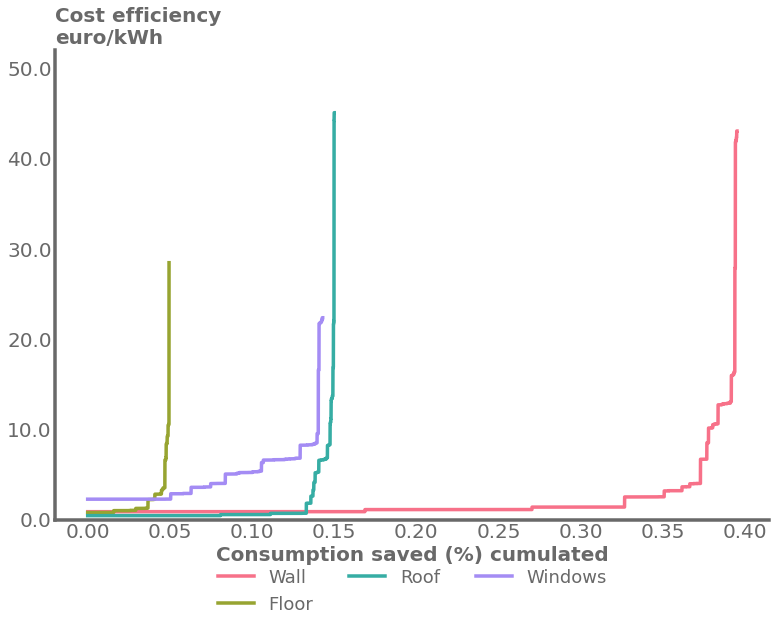

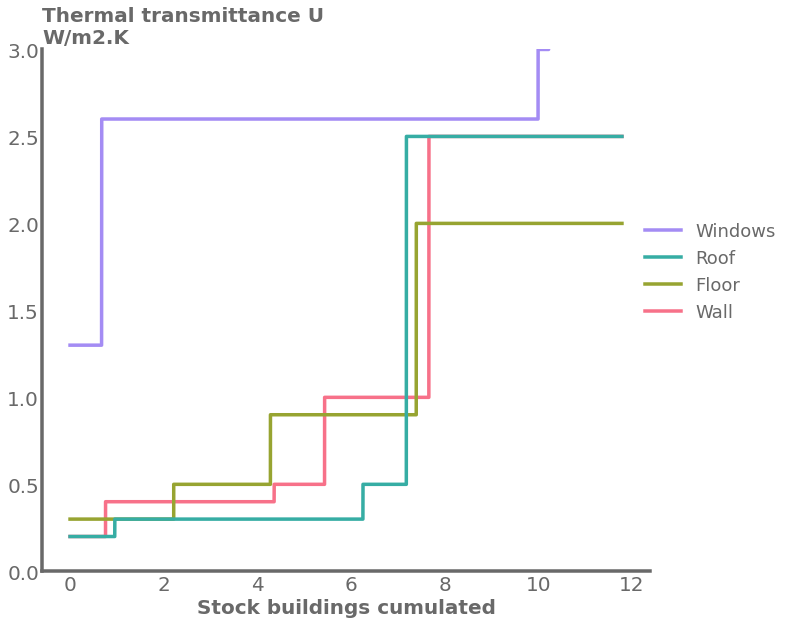

In [50]:
analysis_cost_efficiency(building_stock='medium_5', val='Single-family', level='Housing type')
analysis_cost_efficiency(building_stock='medium_5', val='Multi-family', level='Housing type')


2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:42,845 - 19524 - log_ - INFO - Crea

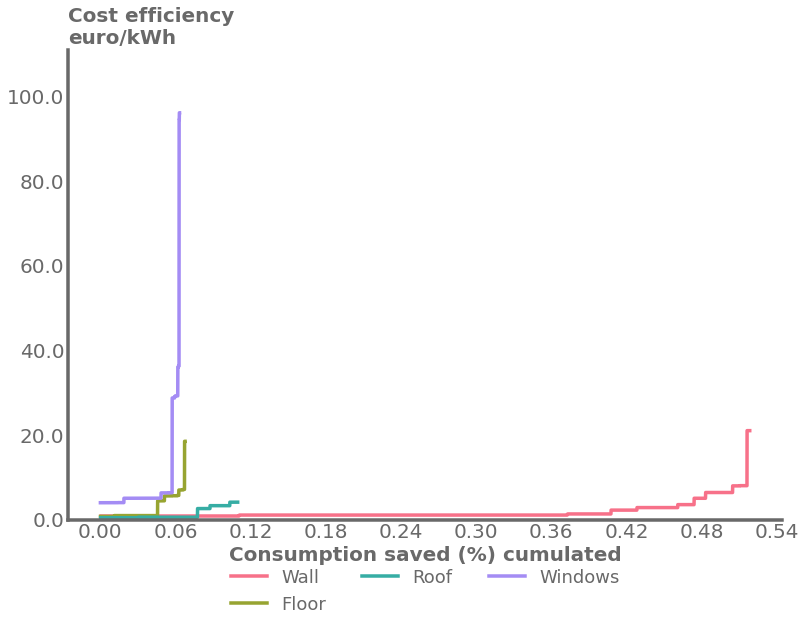

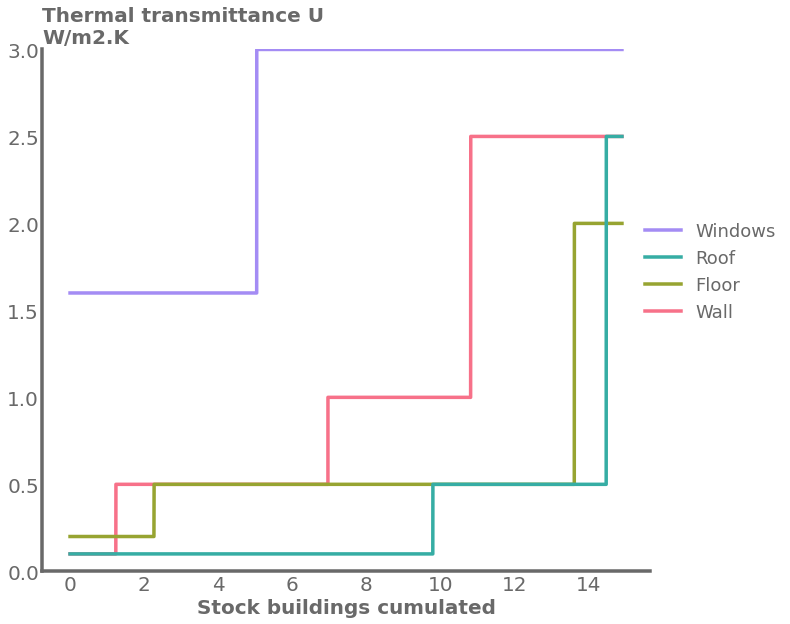

2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:44,581 - 19524 - log_ - INFO - Crea

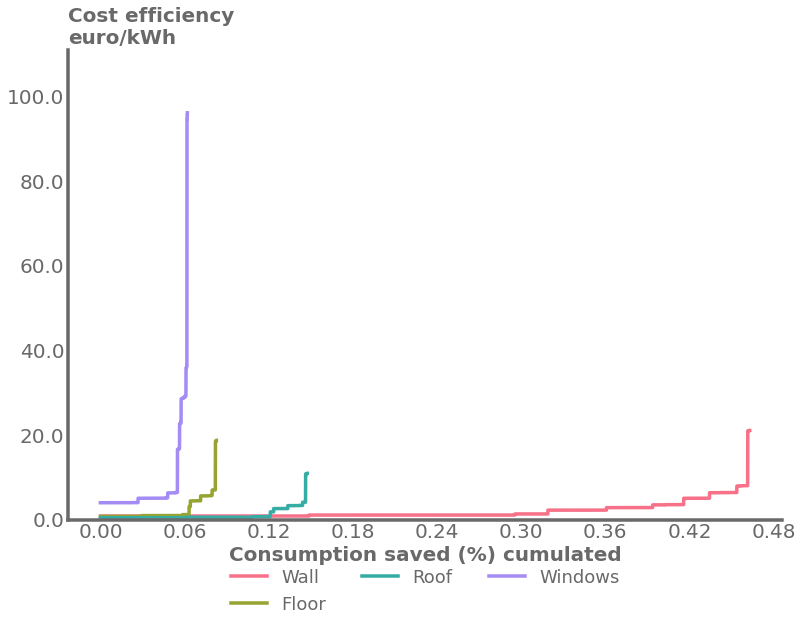

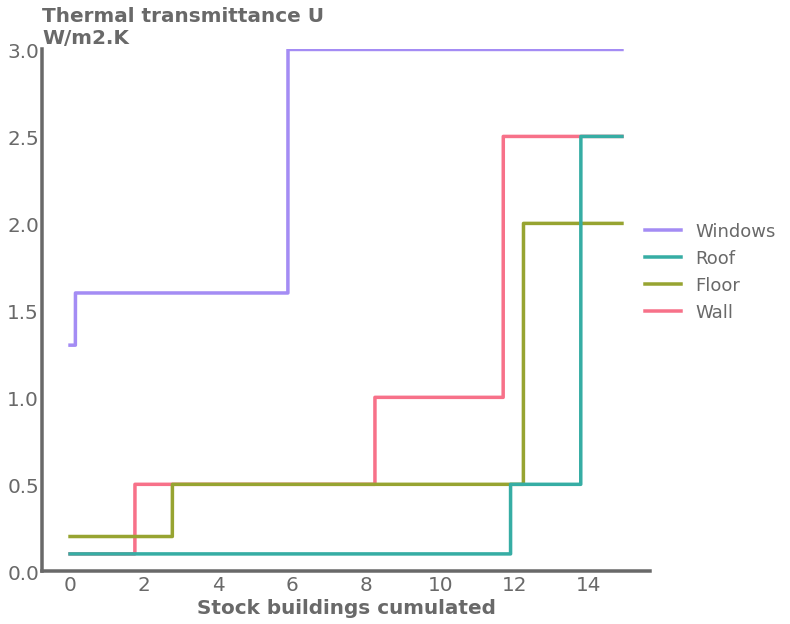

2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:48,120 - 19524 - log_ - INFO - Crea

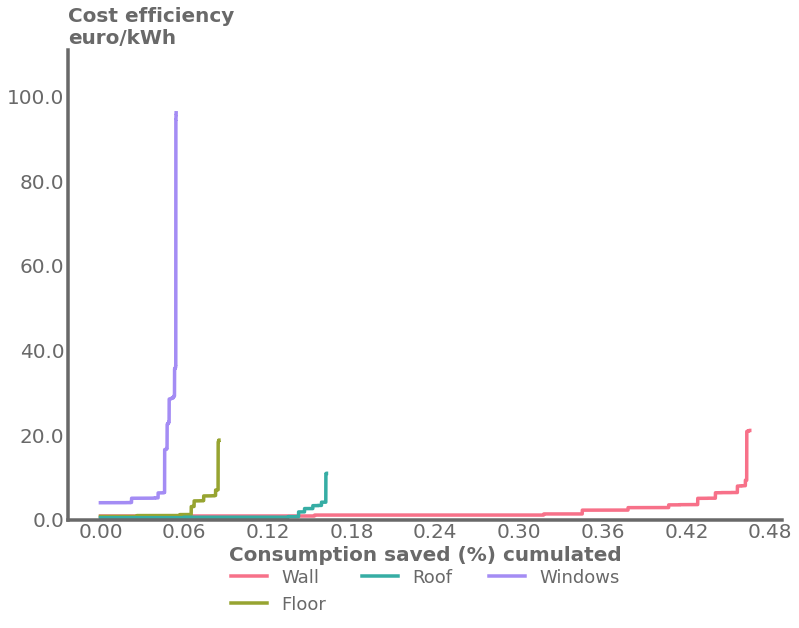

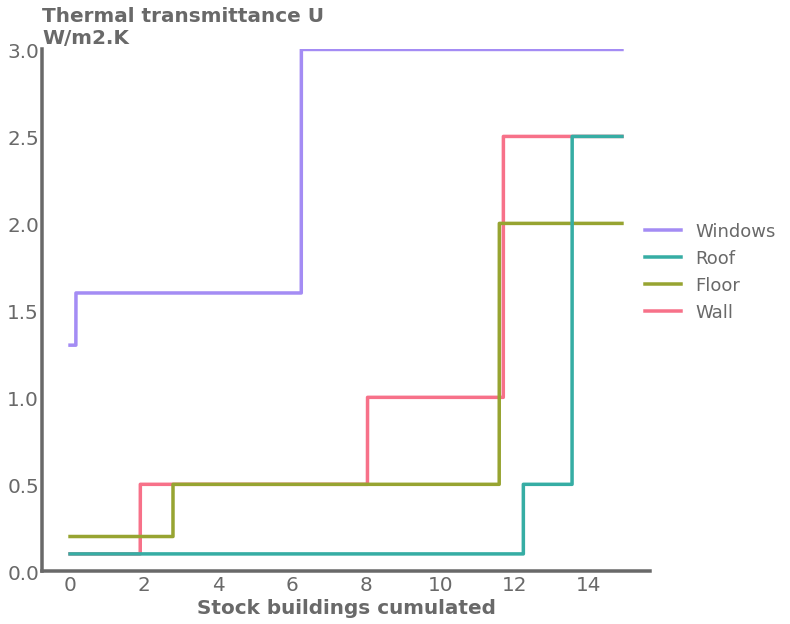

2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:53,729 - 19524 - log_ - INFO - Crea

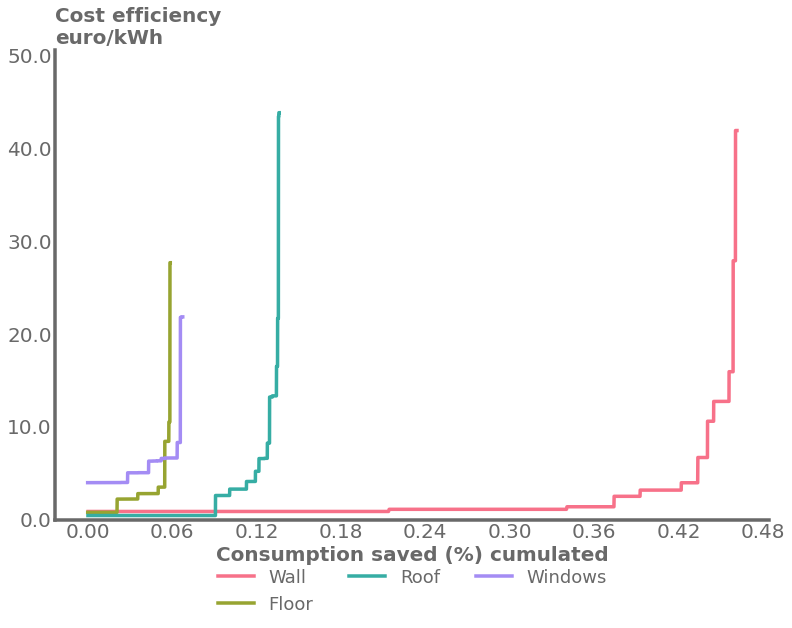

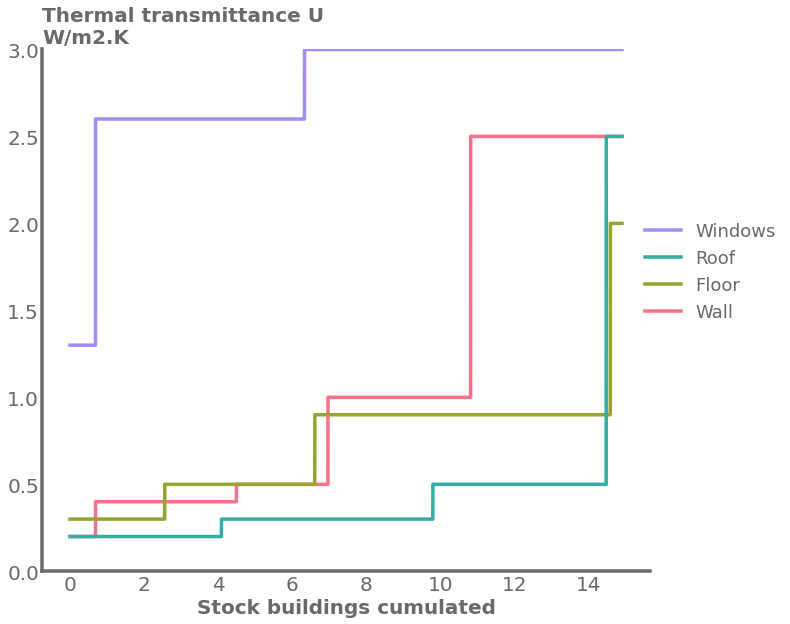

2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:55,454 - 19524 - log_ - INFO - Crea

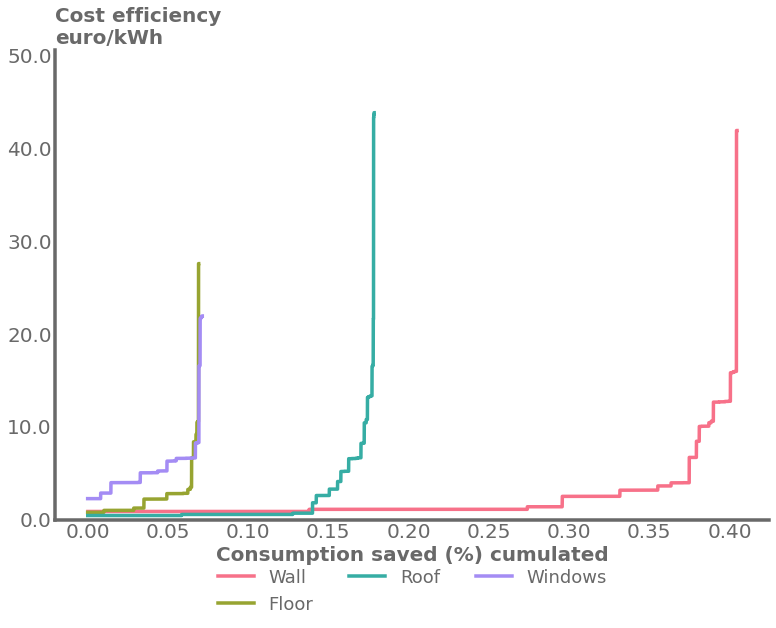

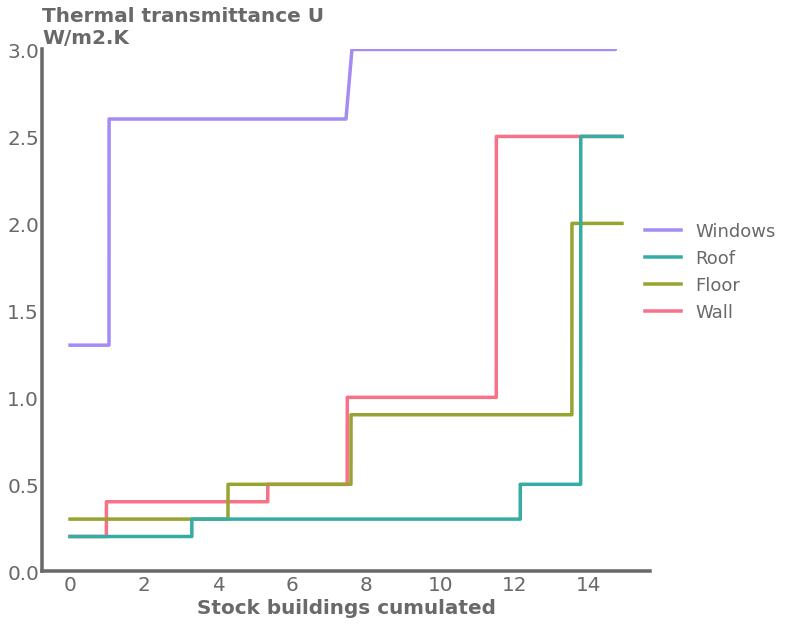

2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Creating AgentBuildings object
2022-11-21 18:33:59,378 - 19524 - log_ - INFO - Crea

KeyboardInterrupt: 

In [49]:
for building_stock in ['simple_1', 'simple_3', 'simple_5', 'medium_1', 'medium_3', 'medium_5']:
    analysis_cost_efficiency(building_stock=building_stock, val='Single-family', level='Housing type')

In [30]:
insulation = {'Wall': (True, False, False, False), 'Floor': (False, True, False, False),
              'Roof': (False, False, True, False), 'Windows': (False, False, False, True)}